In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

def plot_data_from_year_range(df, starting_year, ending_year, title, xlabel, ylabel, gap, filename):
    firstrow = starting_year - 1880
    lastrow = ending_year - 1880
    x = range(starting_year, ending_year + 1)
    y = df["CSIRO Adjusted Sea Level"][firstrow:lastrow + 1]
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(starting_year, ending_year + 1, gap))
        
    plt.savefig(filename, bbox_inches='tight')
    
    m, b = np.polyfit(x, y, 1)
    return m
def plot_rates_of_change(df):
    x = [1880, 1885]
    yreal = []
    for i in range(26):
        firstrow = x[0] - 1880
        lastrow = x[1] - 1880
        

               
        y = [df["CSIRO Adjusted Sea Level"][firstrow], df["CSIRO Adjusted Sea Level"][lastrow]]
        m, b = np.polyfit(x, y, 1)
        x[0]+=5
        x[1]+=5
        yreal.append(m)
        
    print(len(yreal))
        
    plt.plot(range(1880, 2010, 5), yreal)
    plt.title("Rate of change of GASL vs Time")
    plt.xlabel("Time (year)")
    plt.ylabel("Rate of change of GASL")
    plt.xticks(range(1880, 2010 + 1, 25))
    plt.savefig("rates.png", bbox_inches="tight")

    
    
    
    
    

In [229]:
df = read_and_preprocess("sea_level_data.csv", ["Lower Error Bound", "Upper Error Bound", "NOAA Adjusted Sea Level"], [])


0.06304458401213471

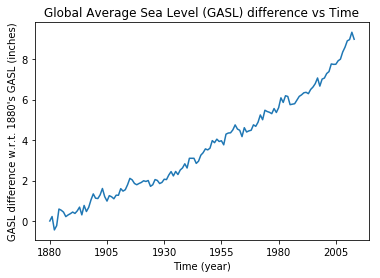

In [230]:
plot_data_from_year_range(df, 1880, 2013, "Global Average Sea Level (GASL) difference vs Time", "Time (year)", "GASL difference w.r.t. 1880's GASL (inches)", 25, "whole.png")


0.14443705885584426

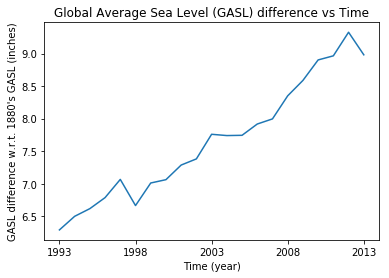

In [231]:
plot_data_from_year_range(df, 1993, 2013, "Global Average Sea Level (GASL) difference vs Time", "Time (year)", "GASL difference w.r.t. 1880's GASL (inches)", 5, "last20.png")


0.05637079450129885

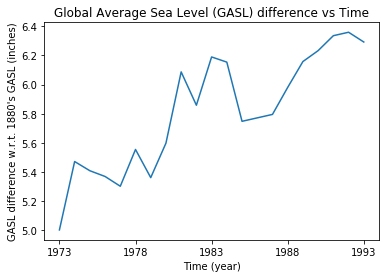

In [232]:
plot_data_from_year_range(df, 1973, 1993, "Global Average Sea Level (GASL) difference vs Time", "Time (year)", "GASL difference w.r.t. 1880's GASL (inches)", 5, "prior20.png")


26


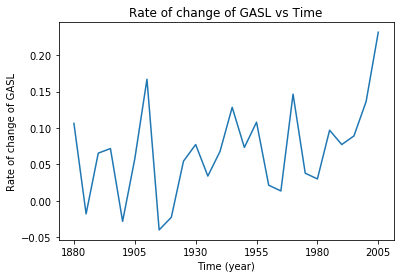

In [233]:
plot_rates_of_change(df)

In [234]:
df["CSIRO Adjusted Sea Level"][0]

0.0